## Task-3: Feature Engineering

### 1. Installations and imports

In [3]:
import pandas as pd
from datetime import date
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

### 2. Upload data

In [34]:
df = pd.read_csv('/content/Lagos_GDP_Population_Dataset.csv')
df.head()

,row_id,#source,#lat_deg,#lon_deg,#report_date,#status_id,#water_source,#water_source_clean,#water_tech_clean,#water_tech,#facility_type,#adm2,#management,#pay,#status,#subjective_quality,#notes,#photo_lnk,water_tech_original,water_source_original,management_clean,management_original,water_source_category,water_tech_category,count,Population,Classification as urban/semi-urban/rural,Income classification,Water demand (lpcd)
0,185053,"Federal Ministry of Water Resources, Nigeria",6.601190,3.394098,16-05-2015 00:00,Yes,Improved Protected dug well,Protected Shallow Well,Mechanized Pump,Motorised,Improved,Kosofe,Direct Government Operation,No,Functional (and in use),Acceptable quality,Kosofe senior sch.kosofe,https://akvoflow-55.s3.amazonaws.com/images/38...,motorised,improved protected dug well,Direct Government Operation,direct government operation,Well,Mechanized Pump,1,665421,Semi-urban,Middle-income,70-120
1,185368,"Federal Ministry of Water Resources, Nigeria",6.674977,3.712242,29-05-2015 00:00,Yes,Improved Protected dug well,Protected Spring,NaN,Gravity,Improved,Epe,Institutional Management - School,No,Functional (and in use),Acceptable quality,"U P E Primary School,Shagamu road,Odo Ayandelu...",https://akvoflow-55.s3.amazonaws.com/images/fd...,NaN,gravity,School Management,institutional management - school,Spring,NaN,1,181715,Rural,Low-income,50-70
2,185381,"Federal Ministry of Water Resources, Nigeria",6.413153,4.087083,08-06-2015 00:00,No,Improved Tube well or borehole,Borehole,Mechanized Pump,Motorised,Improved,Ibeju-Lekki,NaN,No,Non-functional Technical breakdown,Acceptable quality,Osoroko,https://akvoflow-55.s3.amazonaws.com/images/2c...,motorised,improved tube well or borehole,NaN,NaN,Well,Mechanized Pump,1,117542,Urban,High-income,120-150
3,185740,"Federal Ministry of Water Resources, Nigeria",6.583227,3.981810,27-05-2015 00:00,Yes,Improved Tube well or borehole,Borehole,Mechanized Pump,Motorised,Improved,Epe,Other,No,Functional (and in use),Acceptable quality,Araromi market.,https://akvoflow-55.s3.amazonaws.com/images/62...,motorised,improved tube well or borehole,Other,other,Well,Mechanized Pump,1,181715,Rural,Low-income,50-70
4,185627,"Federal Ministry of Water Resources, Nigeria",6.630905,3.986448,31-05-2015 00:00,Yes,Improved Tube well or borehole,Borehole,Mechanized Pump,Motorised,Improved,Epe,Community Management,No,Functional (and in use),Acceptable quality,Naforija.Eredo Road.,https://akvoflow-55.s3.amazonaws.com/images/0c...,motorised,improved tube well or borehole,Community Management,community management,Well,Mechanized Pump,1,181715,Rural,Low-income,50-70


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   row_id                                    1506 non-null   int64  
 1   #source                                   1506 non-null   object 
 2   #lat_deg                                  1506 non-null   float64
 3   #lon_deg                                  1506 non-null   float64
 4   #report_date                              1506 non-null   object 
 5   #status_id                                1506 non-null   object 
 6   #water_source                             1506 non-null   object 
 7   #water_source_clean                       1506 non-null   object 
 8   #water_tech_clean                         1454 non-null   object 
 9   #water_tech                               1506 non-null   object 
 10  #facility_type                      

### 3. Imputation

In [36]:
df.isnull().sum()

row_id                                        0
#source                                       0
#lat_deg                                      0
#lon_deg                                      0
#report_date                                  0
#status_id                                    0
#water_source                                 0
#water_source_clean                           0
#water_tech_clean                            52
#water_tech                                   0
#facility_type                                0
#adm2                                         0
#management                                 470
#pay                                          0
#status                                       0
#subjective_quality                           0
#notes                                        0
#photo_lnk                                   47
water_tech_original                          52
water_source_original                         0
management_clean                        

In [37]:
# As we can see there are a lot of null values so we have impute that

# we impute mode values as all missing values are categorical 

df['#water_tech_clean'].fillna(df['#water_tech_clean'].mode()[0], inplace = True)
df['#management'].fillna(df['#management'].mode()[0], inplace = True)
df['#photo_lnk'].fillna(df['#photo_lnk'].mode()[0], inplace = True)
df['water_tech_original'].fillna(df['water_tech_original'].mode()[0], inplace = True)
df['water_source_original'].fillna(df['water_source_original'].mode()[0], inplace = True)
df['management_clean'].fillna(df['management_clean'].mode()[0], inplace = True)
df['management_original'].fillna(df['management_original'].mode()[0], inplace = True)
df['water_tech_category'].fillna(df['water_tech_category'].mode()[0], inplace = True)

df.isnull().sum()

row_id                                      0
#source                                     0
#lat_deg                                    0
#lon_deg                                    0
#report_date                                0
#status_id                                  0
#water_source                               0
#water_source_clean                         0
#water_tech_clean                           0
#water_tech                                 0
#facility_type                              0
#adm2                                       0
#management                                 0
#pay                                        0
#status                                     0
#subjective_quality                         0
#notes                                      0
#photo_lnk                                  0
water_tech_original                         0
water_source_original                       0
management_clean                            0
management_original               

### 4. Feature Transformation

In [38]:
# time in string does not give us any information, days passed is a better
def calculate_days_passed(times):
  times = str(times)
  date1 = date(int(times[6:10]), int(times[3:5]), int(times[0:2]))
  date2 = date.today()
  return (date2-date1).days
 
df['days_passed'] = df['#report_date'].apply(calculate_days_passed)
df['days_passed'].describe()

count    1506.000000
mean     2667.531208
std         9.394882
min      2651.000000
25%      2661.000000
50%      2666.000000
75%      2674.000000
max      2687.000000
Name: days_passed, dtype: float64

In [40]:
# fix issue of spelling mistakes in water_tech col
def fix_typo(tech):
  if tech == 'pipe bone water' or tech == 'pipe boren water':
    return 'pipe borne water'
  else:
    return tech.lower()

df['#water_tech'] = df['#water_tech'].apply(fix_typo)
df['#water_tech'].describe()

count          1506
unique           16
top       motorised
freq           1286
Name: #water_tech, dtype: object

In [45]:
# no useful information
df = df.drop(columns=['#notes', '#photo_lnk', 'Income classification'])
df.head()

,row_id,#source,#lat_deg,#lon_deg,#report_date,#status_id,#water_source,#water_source_clean,#water_tech_clean,#water_tech,#facility_type,#adm2,#management,#pay,#status,#subjective_quality,water_tech_original,water_source_original,management_clean,management_original,water_source_category,water_tech_category,count,Population,Classification as urban/semi-urban/rural,Water demand (lpcd),days_passed,dist,angle
0,185053,"Federal Ministry of Water Resources, Nigeria",6.601190,3.394098,16-05-2015 00:00,Yes,Improved Protected dug well,Protected Shallow Well,Mechanized Pump,motorised,Improved,Kosofe,Direct Government Operation,No,Functional (and in use),Acceptable quality,motorised,improved protected dug well,Direct Government Operation,direct government operation,Well,Mechanized Pump,1,665421,Semi-urban,70-120,2678,7.422642,0.474915
1,185368,"Federal Ministry of Water Resources, Nigeria",6.674977,3.712242,29-05-2015 00:00,Yes,Improved Protected dug well,Protected Spring,Mechanized Pump,gravity,Improved,Epe,Institutional Management - School,No,Functional (and in use),Acceptable quality,motorised,gravity,School Management,institutional management - school,Spring,Mechanized Pump,1,181715,Rural,50-70,2665,7.637804,0.507547
2,185381,"Federal Ministry of Water Resources, Nigeria",6.413153,4.087083,08-06-2015 00:00,No,Improved Tube well or borehole,Borehole,Mechanized Pump,motorised,Improved,Ibeju-Lekki,Community Management,No,Non-functional Technical breakdown,Acceptable quality,motorised,improved tube well or borehole,Community Management,community management,Well,Mechanized Pump,1,117542,Urban,120-150,2655,7.604787,0.567393
3,185740,"Federal Ministry of Water Resources, Nigeria",6.583227,3.981810,27-05-2015 00:00,Yes,Improved Tube well or borehole,Borehole,Mechanized Pump,motorised,Improved,Epe,Other,No,Functional (and in use),Acceptable quality,motorised,improved tube well or borehole,Other,other,Well,Mechanized Pump,1,181715,Rural,50-70,2667,7.693743,0.543972
4,185627,"Federal Ministry of Water Resources, Nigeria",6.630905,3.986448,31-05-2015 00:00,Yes,Improved Tube well or borehole,Borehole,Mechanized Pump,motorised,Improved,Epe,Community Management,No,Functional (and in use),Acceptable quality,motorised,improved tube well or borehole,Community Management,community management,Well,Mechanized Pump,1,181715,Rural,50-70,2663,7.736968,0.541296


In [46]:
# convert cartesian coordinates to polar
# A common approach in these cases is to transform the coordinates into polar coordinates, and add them as new features. When you think about it, you're adding a new way of expressing a same thing, just in a different scale or system. That way a tree will require less splits to be able to model this spatial dependency of the samples.
# https://stackoverflow.com/questions/61572370/dealing-with-longitude-and-latitude-in-feature-engineering
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

df['dist'], df['angle'] = cart2pol(df["#lat_deg"].to_numpy(),df["#lon_deg"].to_numpy())
df.head()

,row_id,#source,#lat_deg,#lon_deg,#report_date,#status_id,#water_source,#water_source_clean,#water_tech_clean,#water_tech,#facility_type,#adm2,#management,#pay,#status,#subjective_quality,water_tech_original,water_source_original,management_clean,management_original,water_source_category,water_tech_category,count,Population,Classification as urban/semi-urban/rural,Water demand (lpcd),days_passed,dist,angle
0,185053,"Federal Ministry of Water Resources, Nigeria",6.601190,3.394098,16-05-2015 00:00,Yes,Improved Protected dug well,Protected Shallow Well,Mechanized Pump,motorised,Improved,Kosofe,Direct Government Operation,No,Functional (and in use),Acceptable quality,motorised,improved protected dug well,Direct Government Operation,direct government operation,Well,Mechanized Pump,1,665421,Semi-urban,70-120,2678,7.422642,0.474915
1,185368,"Federal Ministry of Water Resources, Nigeria",6.674977,3.712242,29-05-2015 00:00,Yes,Improved Protected dug well,Protected Spring,Mechanized Pump,gravity,Improved,Epe,Institutional Management - School,No,Functional (and in use),Acceptable quality,motorised,gravity,School Management,institutional management - school,Spring,Mechanized Pump,1,181715,Rural,50-70,2665,7.637804,0.507547
2,185381,"Federal Ministry of Water Resources, Nigeria",6.413153,4.087083,08-06-2015 00:00,No,Improved Tube well or borehole,Borehole,Mechanized Pump,motorised,Improved,Ibeju-Lekki,Community Management,No,Non-functional Technical breakdown,Acceptable quality,motorised,improved tube well or borehole,Community Management,community management,Well,Mechanized Pump,1,117542,Urban,120-150,2655,7.604787,0.567393
3,185740,"Federal Ministry of Water Resources, Nigeria",6.583227,3.981810,27-05-2015 00:00,Yes,Improved Tube well or borehole,Borehole,Mechanized Pump,motorised,Improved,Epe,Other,No,Functional (and in use),Acceptable quality,motorised,improved tube well or borehole,Other,other,Well,Mechanized Pump,1,181715,Rural,50-70,2667,7.693743,0.543972
4,185627,"Federal Ministry of Water Resources, Nigeria",6.630905,3.986448,31-05-2015 00:00,Yes,Improved Tube well or borehole,Borehole,Mechanized Pump,motorised,Improved,Epe,Community Management,No,Functional (and in use),Acceptable quality,motorised,improved tube well or borehole,Community Management,community management,Well,Mechanized Pump,1,181715,Rural,50-70,2663,7.736968,0.541296


### 5. One hot encoding

In [47]:
one_hot_encoded_columns = {}
for col in df:
  if isinstance(df[col].iloc[0], str):
    lst = list(df[col].unique())
    print("Col name: " + col)
    print("Col list: " + str(lst))
    one_hot_encoded_columns[col] = lst
    df[col + "_one-hot"] = df[col].apply(lambda x: lst.index(x))
    pd.set_option('display.max_columns', None)
df.head()


Col name: #source
Col list: ['Federal Ministry of Water Resources, Nigeria']
Col name: #report_date
Col list: ['16-05-2015 00:00', '29-05-2015 00:00', '08-06-2015 00:00', '27-05-2015 00:00', '31-05-2015 00:00', '26-05-2015 00:00', '09-05-2015 00:00', '15-05-2015 00:00', '13-05-2015 00:00', '19-05-2015 00:00', '11-05-2015 00:00', '23-05-2015 00:00', '07-05-2015 00:00', '28-05-2015 00:00', '01-06-2015 00:00', '10-05-2015 00:00', '04-06-2015 00:00', '17-05-2015 00:00', '18-05-2015 00:00', '03-06-2015 00:00', '22-05-2015 00:00', '20-05-2015 00:00', '12-05-2015 00:00', '25-05-2015 00:00', '14-05-2015 00:00', '06-06-2015 00:00', '30-05-2015 00:00', '10-06-2015 00:00', '21-05-2015 00:00', '08-05-2015 00:00', '11-06-2015 00:00', '02-06-2015 00:00', '07-06-2015 00:00', '09-06-2015 00:00', '12-06-2015 00:00', '24-05-2015 00:00', '05-06-2015 00:00']
Col name: #status_id
Col list: ['Yes', 'No']
Col name: #water_source
Col list: ['Improved Protected dug well', 'Improved Tube well or borehole', 'Imp

,row_id,#source,#lat_deg,#lon_deg,#report_date,#status_id,#water_source,#water_source_clean,#water_tech_clean,#water_tech,#facility_type,#adm2,#management,#pay,#status,#subjective_quality,water_tech_original,water_source_original,management_clean,management_original,water_source_category,water_tech_category,count,Population,Classification as urban/semi-urban/rural,Water demand (lpcd),days_passed,dist,angle,#source_one-hot,#report_date_one-hot,#status_id_one-hot,#water_source_one-hot,#water_source_clean_one-hot,#water_tech_clean_one-hot,#water_tech_one-hot,#facility_type_one-hot,#adm2_one-hot,#management_one-hot,#pay_one-hot,#status_one-hot,#subjective_quality_one-hot,water_tech_original_one-hot,water_source_original_one-hot,management_clean_one-hot,management_original_one-hot,water_source_category_one-hot,water_tech_category_one-hot,Classification as urban/semi-urban/rural_one-hot,Water demand (lpcd)_one-hot
0,185053,"Federal Ministry of Water Resources, Nigeria",6.601190,3.394098,16-05-2015 00:00,Yes,Improved Protected dug well,Protected Shallow Well,Mechanized Pump,motorised,Improved,Kosofe,Direct Government Operation,No,Functional (and in use),Acceptable quality,motorised,improved protected dug well,Direct Government Operation,direct government operation,Well,Mechanized Pump,1,665421,Semi-urban,70-120,2678,7.422642,0.474915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,185368,"Federal Ministry of Water Resources, Nigeria",6.674977,3.712242,29-05-2015 00:00,Yes,Improved Protected dug well,Protected Spring,Mechanized Pump,gravity,Improved,Epe,Institutional Management - School,No,Functional (and in use),Acceptable quality,motorised,gravity,School Management,institutional management - school,Spring,Mechanized Pump,1,181715,Rural,50-70,2665,7.637804,0.507547,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,1,1,1,0,1,1
2,185381,"Federal Ministry of Water Resources, Nigeria",6.413153,4.087083,08-06-2015 00:00,No,Improved Tube well or borehole,Borehole,Mechanized Pump,motorised,Improved,Ibeju-Lekki,Community Management,No,Non-functional Technical breakdown,Acceptable quality,motorised,improved tube well or borehole,Community Management,community management,Well,Mechanized Pump,1,117542,Urban,120-150,2655,7.604787,0.567393,0,2,1,1,2,0,0,0,2,2,0,1,0,0,2,2,2,0,0,2,2
3,185740,"Federal Ministry of Water Resources, Nigeria",6.583227,3.981810,27-05-2015 00:00,Yes,Improved Tube well or borehole,Borehole,Mechanized Pump,motorised,Improved,Epe,Other,No,Functional (and in use),Acceptable quality,motorised,improved tube well or borehole,Other,other,Well,Mechanized Pump,1,181715,Rural,50-70,2667,7.693743,0.543972,0,3,0,1,2,0,0,0,1,3,0,0,0,0,2,3,3,0,0,1,1
4,185627,"Federal Ministry of Water Resources, Nigeria",6.630905,3.986448,31-05-2015 00:00,Yes,Improved Tube well or borehole,Borehole,Mechanized Pump,motorised,Improved,Epe,Community Management,No,Functional (and in use),Acceptable quality,motorised,improved tube well or borehole,Community Management,community management,Well,Mechanized Pump,1,181715,Rural,50-70,2663,7.736968,0.541296,0,4,0,1,2,0,0,0,1,2,0,0,0,0,2,2,2,0,0,1,1


In [72]:
df['count'].describe()

count    1506.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: count, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


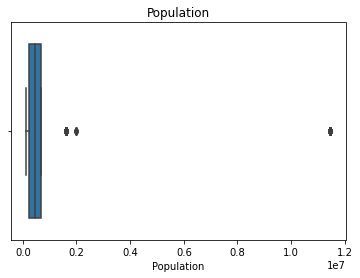

<Figure size 432x360 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


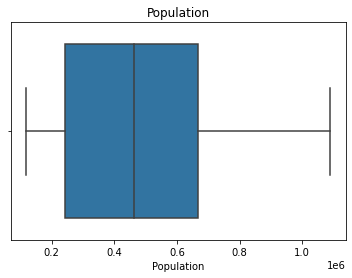

<Figure size 432x360 with 0 Axes>

In [48]:
#checking outliers in population

sns.boxplot(df['Population']).set_title('Population')
plt.figure(figsize = (6,5))
plt.show()

# "#replacing outliers in population by median\n",
Q1 = df['Population'].quantile(0.25)
Q3 = df['Population'].quantile(0.75)
IQR = Q3 - Q1
lower_IQR = Q1 - (IQR)
upper_IQR = Q3 + (IQR)
df['Population']=np.where(df['Population']>upper_IQR,upper_IQR,np.where(df['Population']<lower_IQR,lower_IQR,df['Population']))


#Drawing boxplot after removing outliers\n",
sns.boxplot(df['Population']).set_title('Population')
plt.figure(figsize = (6,5))
plt.show()
   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


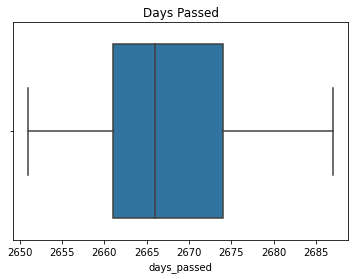

<Figure size 432x360 with 0 Axes>

In [49]:
# Checking  Outliers in days_passed
sns.boxplot(df['days_passed']).set_title('Days Passed')
plt.figure(figsize = (6,5))
plt.show()   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


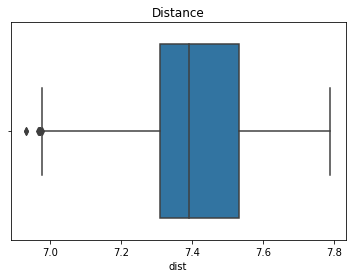

<Figure size 432x360 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


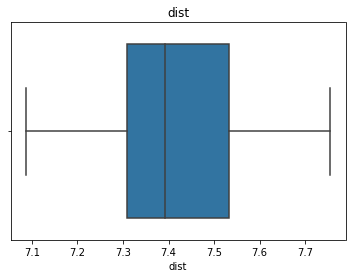

<Figure size 432x360 with 0 Axes>

In [50]:
# Checking  Outliers in Distance
sns.boxplot(df['dist']).set_title('Distance')
plt.figure(figsize = (6,5))
plt.show()

# replacing outliers in Distance by median\n",
Q1 = df['dist'].quantile(0.25)
Q3 = df['dist'].quantile(0.75)
IQR = Q3 - Q1
lower_IQR = Q1 - (IQR)
upper_IQR = Q3 + (IQR)
df['dist']=np.where(df['dist']>upper_IQR,upper_IQR,np.where(df['dist']<lower_IQR,lower_IQR,df['dist']))
#Drawing boxplot after removing outliers\n",
sns.boxplot(df['dist']).set_title('dist')
plt.figure(figsize = (6,5))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


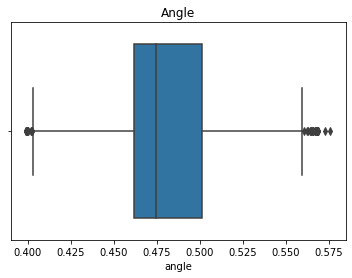

<Figure size 432x360 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


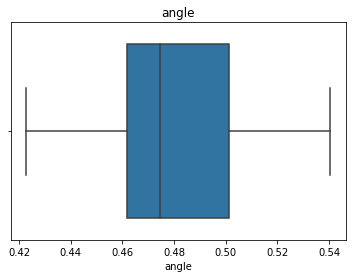

<Figure size 432x360 with 0 Axes>

In [51]:
#Checking outliers in Angles
sns.boxplot(df['angle']).set_title('Angle')
plt.figure(figsize = (6,5))
plt.show()

# replacing outliers in Angle by median\n",
Q1 = df['angle'].quantile(0.25)
Q3 = df['angle'].quantile(0.75)
IQR = Q3 - Q1
lower_IQR = Q1 - (IQR)
upper_IQR = Q3 + (IQR)
df['angle']=np.where(df['angle']>upper_IQR,upper_IQR,np.where(df['angle']<lower_IQR,lower_IQR,df['angle']))
#Drawing boxplot after removing outliers\n",
sns.boxplot(df['angle']).set_title('angle')
plt.figure(figsize = (6,5))
plt.show()


#### 6. Log Transform

In [52]:
df['log_Population'] = np.log2(df['Population'])
df['log_days_passed'] = np.log2(df['days_passed']) 
#We are adding constants to avoid -ve values in the log transformation
df['log_dist'] = np.log2(df['dist']+1000)
df['log_angle'] = np.log2(df['angle']+1000)
df.head()


,row_id,#source,#lat_deg,#lon_deg,#report_date,#status_id,#water_source,#water_source_clean,#water_tech_clean,#water_tech,#facility_type,#adm2,#management,#pay,#status,#subjective_quality,water_tech_original,water_source_original,management_clean,management_original,water_source_category,water_tech_category,count,Population,Classification as urban/semi-urban/rural,Water demand (lpcd),days_passed,dist,angle,#source_one-hot,#report_date_one-hot,#status_id_one-hot,#water_source_one-hot,#water_source_clean_one-hot,#water_tech_clean_one-hot,#water_tech_one-hot,#facility_type_one-hot,#adm2_one-hot,#management_one-hot,#pay_one-hot,#status_one-hot,#subjective_quality_one-hot,water_tech_original_one-hot,water_source_original_one-hot,management_clean_one-hot,management_original_one-hot,water_source_category_one-hot,water_tech_category_one-hot,Classification as urban/semi-urban/rural_one-hot,Water demand (lpcd)_one-hot,log_Population,log_days_passed,log_dist,log_angle
0,185053,"Federal Ministry of Water Resources, Nigeria",6.601190,3.394098,16-05-2015 00:00,Yes,Improved Protected dug well,Protected Shallow Well,Mechanized Pump,motorised,Improved,Kosofe,Direct Government Operation,No,Functional (and in use),Acceptable quality,motorised,improved protected dug well,Direct Government Operation,direct government operation,Well,Mechanized Pump,1,665421.0,Semi-urban,70-120,2678,7.422642,0.474915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.343908,11.386940,9.976453,9.966469
1,185368,"Federal Ministry of Water Resources, Nigeria",6.674977,3.712242,29-05-2015 00:00,Yes,Improved Protected dug well,Protected Spring,Mechanized Pump,gravity,Improved,Epe,Institutional Management - School,No,Functional (and in use),Acceptable quality,motorised,gravity,School Management,institutional management - school,Spring,Mechanized Pump,1,181715.0,Rural,50-70,2665,7.637804,0.507547,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,1,1,1,0,1,1,17.471318,11.379920,9.976761,9.966516
2,185381,"Federal Ministry of Water Resources, Nigeria",6.413153,4.087083,08-06-2015 00:00,No,Improved Tube well or borehole,Borehole,Mechanized Pump,motorised,Improved,Ibeju-Lekki,Community Management,No,Non-functional Technical breakdown,Acceptable quality,motorised,improved tube well or borehole,Community Management,community management,Well,Mechanized Pump,1,117542.0,Urban,120-150,2655,7.604787,0.540490,0,2,1,1,2,0,0,0,2,2,0,1,0,0,2,2,2,0,0,2,2,16.842817,11.374496,9.976714,9.966564
3,185740,"Federal Ministry of Water Resources, Nigeria",6.583227,3.981810,27-05-2015 00:00,Yes,Improved Tube well or borehole,Borehole,Mechanized Pump,motorised,Improved,Epe,Other,No,Functional (and in use),Acceptable quality,motorised,improved tube well or borehole,Other,other,Well,Mechanized Pump,1,181715.0,Rural,50-70,2667,7.693743,0.540490,0,3,0,1,2,0,0,0,1,3,0,0,0,0,2,3,3,0,0,1,1,17.471318,11.381002,9.976842,9.966564
4,185627,"Federal Ministry of Water Resources, Nigeria",6.630905,3.986448,31-05-2015 00:00,Yes,Improved Tube well or borehole,Borehole,Mechanized Pump,motorised,Improved,Epe,Community Management,No,Functional (and in use),Acceptable quality,motorised,improved tube well or borehole,Community Management,community management,Well,Mechanized Pump,1,181715.0,Rural,50-70,2663,7.736968,0.540490,0,4,0,1,2,0,0,0,1,2,0,0,0,0,2,2,2,0,0,1,1,17.471318,11.378837,9.976903,9.966564


In [53]:
df.shape

(1506, 54)

### 7. Scaling (standardization)

In [18]:
## To standardize the data in pandas, Z-Score is a very popular method in pandas that is used to standardize the data

#lst_of_col = ['log_Population','log_days_passed', 'log_dist', 'log_angle']
#for col in lst_of_col:
  #df[col] = (df[col] - df[col].mean()) / df[col].std()
#df.head()

#Standardization is creating -ve values in the distance, angle, population and days_passed
#Hence I used normalizing using Minmaxscaler()

###8. Feature Reduction & Selection

1. Using Chi Square test scores, we can find best features for our model

In [82]:
df_encoded = df.iloc[:, 29:]
df_encoded = df_encoded.drop(columns=['#report_date_one-hot'])
df_encoded.shape

(1506, 24)

In [83]:
# Splitting the target variable and other variables into two variables x and y
x = df_encoded.drop(["Water demand (lpcd)_one-hot"], axis = 1)
y = df_encoded["Water demand (lpcd)_one-hot"]
print(x.shape)
print(y.shape)
x.head()

(1506, 23)
(1506,)


,#source_one-hot,#status_id_one-hot,#water_source_one-hot,#water_source_clean_one-hot,#water_tech_clean_one-hot,#water_tech_one-hot,#facility_type_one-hot,#adm2_one-hot,#management_one-hot,#pay_one-hot,#status_one-hot,#subjective_quality_one-hot,water_tech_original_one-hot,water_source_original_one-hot,management_clean_one-hot,management_original_one-hot,water_source_category_one-hot,water_tech_category_one-hot,Classification as urban/semi-urban/rural_one-hot,log_Population,log_days_passed,log_dist,log_angle
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.343908,11.386940,9.976453,9.966469
1,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,1,1,0,1,17.471318,11.379920,9.976761,9.966516
2,0,1,1,2,0,0,0,2,2,0,1,0,0,2,2,2,0,0,2,16.842817,11.374496,9.976714,9.966564
3,0,0,1,2,0,0,0,1,3,0,0,0,0,2,3,3,0,0,1,17.471318,11.381002,9.976842,9.966564
4,0,0,1,2,0,0,0,1,2,0,0,0,0,2,2,2,0,0,1,17.471318,11.378837,9.976903,9.966564


In [84]:
## To Normalize the data in pandas, Mimmaxscaler can be used to normalize the data between 0 to 1
scaler = MinMaxScaler()
# transform data
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()
x.shape

(1506, 23)

2. Using Threshold Variance for Dimension Reductionality

In [85]:
#Recognizing columns with 99% having same values using Variance Threshold
x.nunique()
variance_fit = VarianceThreshold(threshold=0.01) 
variance_fit.fit_transform(x)
variance_fit.get_support()

# Printing columns that have unique values
x.columns[variance_fit.get_support()]


Index(['#status_id_one-hot', '#water_source_one-hot',
       '#water_source_clean_one-hot', '#water_tech_clean_one-hot',
       '#water_tech_one-hot', '#adm2_one-hot', '#management_one-hot',
       '#pay_one-hot', '#status_one-hot', '#subjective_quality_one-hot',
       'water_tech_original_one-hot', 'water_source_original_one-hot',
       'management_clean_one-hot', 'management_original_one-hot',
       'water_source_category_one-hot', 'water_tech_category_one-hot',
       'Classification as urban/semi-urban/rural_one-hot', 'log_Population',
       'log_days_passed', 'log_dist', 'log_angle'],
      dtype='object')

In [86]:
#filtering Columns of non-unique values or less unique values
nunique_columns =  [column for column in x.columns
                    if column not in x.columns[variance_fit.get_support()]]
print(len(nunique_columns))
x.drop(nunique_columns, axis = 1, inplace = True)
x.shape

2


(1506, 21)

3. Feature Selection with SelectKBest

In [87]:
# Choosing top 10 best features using SelectKBest
best_features = SelectKBest(score_func= chi2, k = 10)
fit = best_features.fit(x, y)

In [88]:
# Assigning scores of Chi2 test to df_scores and  10 best columns to df_columns
df_scores = pd.DataFrame(fit.scores_ )
df_columns = pd.DataFrame(x.columns)

In [89]:
# Concatenating two dataframes for better visualization
chiScores = pd.concat([df_scores, df_columns], axis = 1 )
chiScores.columns = ["scores", "col_name"]
chiScores

,scores,col_name
0,39.434172,#status_id_one-hot
1,2.111403,#water_source_one-hot
2,2.029064,#water_source_clean_one-hot
3,9.113884,#water_tech_clean_one-hot
4,5.538050,#water_tech_one-hot
5,31.291649,#adm2_one-hot
6,1.159449,#management_one-hot
7,21.377954,#pay_one-hot
8,6.666123,#status_one-hot
9,6.454322,#subjective_quality_one-hot


In [91]:
chiScores.nlargest(10,['scores'])

,scores,col_name
16,544.526627,Classification as urban/semi-urban/rural_one-hot
17,170.082633,log_Population
14,60.521957,water_source_category_one-hot
20,57.120668,log_angle
0,39.434172,#status_id_one-hot
18,31.651703,log_days_passed
5,31.291649,#adm2_one-hot
19,22.383527,log_dist
7,21.377954,#pay_one-hot
15,12.519896,water_tech_category_one-hot
